In [1]:
import textacy
import pandas as pd
from textacy.extract import keyterms as kt

In [2]:
from load_data import get_df
df = get_df()
df.reset_index(inplace=True)

In [3]:
terms = []
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
for index in range(len(df)):
    doc = textacy.make_spacy_doc(df['Article'][index], lang=en)
    output = kt.textrank(
        doc,
        normalize="lemma",
        window_size=10,
        edge_weighting="count",
        position_bias=True,
        topn=5,
    )
    for i in range(len(output)):
        terms.append(output[i][0])

In [4]:
len(terms)

4940

In [5]:
terms[:20]

['Covid-19 pandemic present Emerging market',
 'high energy price',
 'energy price pressure',
 'expansionary fiscal policy',
 'review subsidy programmessharp price increase',
 'Queen Elizabeth II',
 'international medium house',
 'news',
 'british colonial rule',
 'british trade point',
 'temple committee member',
 'unidentified miscreant',
 'Dauti Kali Mandir',
 'broken idol',
 'Shailkupa upazila',
 'Dhaka Medical College Hospital',
 'BCL Organising Secretary Nazim Uddin',
 'Dhaka court',
 'case statement',
 'case today']

In [6]:
corpus = terms

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(
    max_df=0.8,
    max_features=1000,
    ngram_range=(1,3)
)

In [9]:
X = cv.fit_transform(corpus)

In [10]:
list(cv.vocabulary_.keys())[:10]

['covid',
 '19',
 'market',
 'covid 19',
 'high',
 'energy',
 'price',
 'policy',
 'subsidy',
 'increase']

[Text(0, 0, 'bangladesh'),
 Text(1, 0, 'yesterday'),
 Text(2, 0, 'world'),
 Text(3, 0, 'minister'),
 Text(4, 0, 'police'),
 Text(5, 0, 'dhaka'),
 Text(6, 0, 'new'),
 Text(7, 0, 'league'),
 Text(8, 0, 'election'),
 Text(9, 0, 'today'),
 Text(10, 0, 'cup'),
 Text(11, 0, 'station'),
 Text(12, 0, 'film'),
 Text(13, 0, 'president'),
 Text(14, 0, 'bank'),
 Text(15, 0, 'bnp'),
 Text(16, 0, 'project'),
 Text(17, 0, 'md'),
 Text(18, 0, 'islam'),
 Text(19, 0, 'national')]

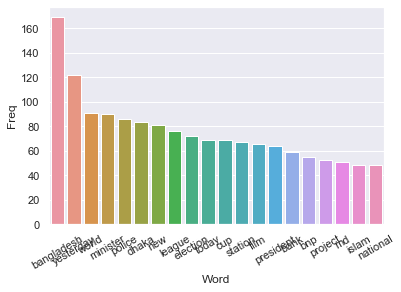

In [11]:
# Most frequently occuring words
import seaborn as sns


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx]) for word, idx in
        vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize': (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                  Bi-gram  Freq
0               world cup    61
1          police station    48
2          prime minister    34
3               t20 world    25
4           mental health    24
5           sheikh hasina    20
6         minister sheikh    19
7         medical college    18
8        college hospital    18
9             new zealand    18
10           awami league    18
11        positivity rate    17
12         chhatra league    16
13  election commissioner    16
14         stock exchange    15
15            power plant    14
16       foreign minister    14
17              sri lanka    14
18            human right    13
19      general secretary    13


[Text(0, 0, 'world cup'),
 Text(1, 0, 'police station'),
 Text(2, 0, 'prime minister'),
 Text(3, 0, 't20 world'),
 Text(4, 0, 'mental health'),
 Text(5, 0, 'sheikh hasina'),
 Text(6, 0, 'minister sheikh'),
 Text(7, 0, 'medical college'),
 Text(8, 0, 'college hospital'),
 Text(9, 0, 'new zealand'),
 Text(10, 0, 'awami league'),
 Text(11, 0, 'positivity rate'),
 Text(12, 0, 'chhatra league'),
 Text(13, 0, 'election commissioner'),
 Text(14, 0, 'stock exchange'),
 Text(15, 0, 'power plant'),
 Text(16, 0, 'foreign minister'),
 Text(17, 0, 'sri lanka'),
 Text(18, 0, 'human right'),
 Text(19, 0, 'general secretary')]

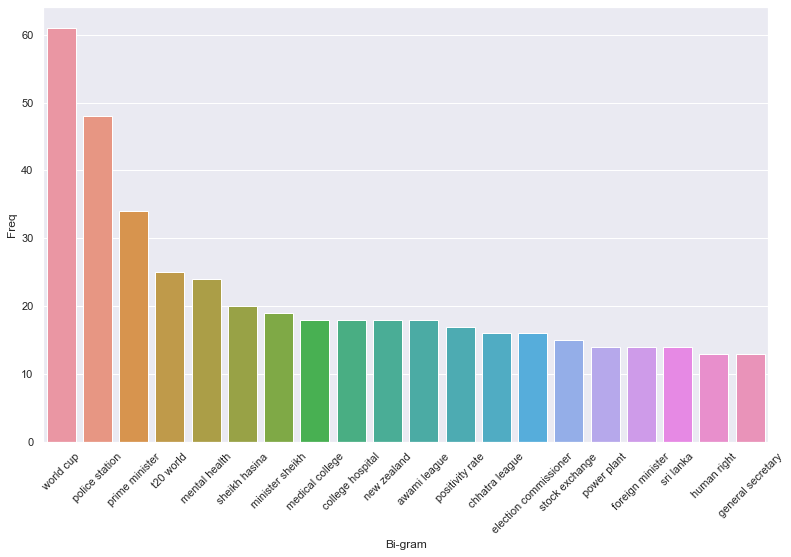

In [12]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize': (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                       Tri-gram  Freq
0                 t20 world cup    25
1         prime minister sheikh    19
2        minister sheikh hasina    19
3      medical college hospital    18
4      president vladimir putin    12
5    russian president vladimir    11
6               shakib al hasan    11
7                ak abdul momen    10
8          sadar police station     9
9            twenty20 world cup     9
10  chief election commissioner     9
11        haji hassanal bolkiah     9
12        dhaka medical college     8
13        daily positivity rate     8
14         sultan haji hassanal     8
15   bangabandhu sheikh mujibur     7
16        sheikh mujibur rahman     7
17            kazi habibul awal     7
18          foreign minister ak     7
19            minister ak abdul     7


[Text(0, 0, 't20 world cup'),
 Text(1, 0, 'prime minister sheikh'),
 Text(2, 0, 'minister sheikh hasina'),
 Text(3, 0, 'medical college hospital'),
 Text(4, 0, 'president vladimir putin'),
 Text(5, 0, 'russian president vladimir'),
 Text(6, 0, 'shakib al hasan'),
 Text(7, 0, 'ak abdul momen'),
 Text(8, 0, 'sadar police station'),
 Text(9, 0, 'twenty20 world cup'),
 Text(10, 0, 'chief election commissioner'),
 Text(11, 0, 'haji hassanal bolkiah'),
 Text(12, 0, 'dhaka medical college'),
 Text(13, 0, 'daily positivity rate'),
 Text(14, 0, 'sultan haji hassanal'),
 Text(15, 0, 'bangabandhu sheikh mujibur'),
 Text(16, 0, 'sheikh mujibur rahman'),
 Text(17, 0, 'kazi habibul awal'),
 Text(18, 0, 'foreign minister ak'),
 Text(19, 0, 'minister ak abdul')]

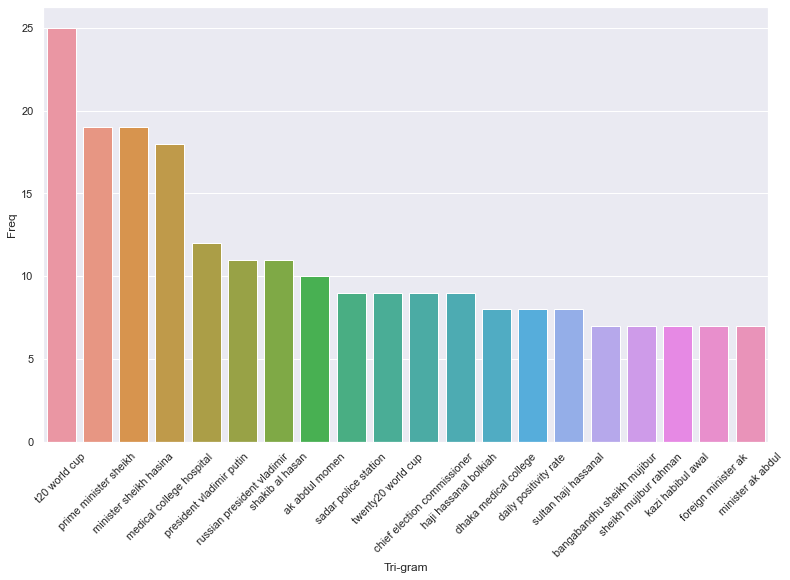

In [13]:
#Most frequently occuring Tri-grams

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize': (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
